In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [2]:
# Matplotlib rcParams
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Arial'

In [3]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [22]:
position_groups = [(0, 21), (1,), (2, 23), (3, 22), (4, 20), (5, 19), (6, 18), (7, 17), (8,), (9,),  (10, 14), (11,), (12,), (13,), (15,), (16,)]
df_res = pd.read_csv('mi_groups_all_km_shuf.csv', index_col=0)

In [23]:
xs = [3,5,10,11,13,14,15,16,21,22,25,26,27,28,29,33,36,39,41,42,43,44,45,46]
dct_pos = {i:p for i, p in enumerate(xs)}

In [24]:
df_res['pg1'] = ['-'.join([str(dct_pos[int(p)] + 1) for p in x.split('-')]) for x in df_res['pg1']]
df_res['pg2'] = ['-'.join([str(dct_pos[int(p)] + 1) for p in x.split('-')]) for x in df_res['pg2']]
position_groups = ['-'.join([str(dct_pos[p]+1) for p in t]) for t in position_groups]

In [25]:
df_mi = pd.DataFrame(np.zeros((len(position_groups), len(position_groups))), index=position_groups, columns=position_groups[::-1])
for pg1, pg2, mi in zip(df_res['pg1'], df_res['pg2'], df_res['mi']):
    df_mi.loc[pg1, pg2] = mi

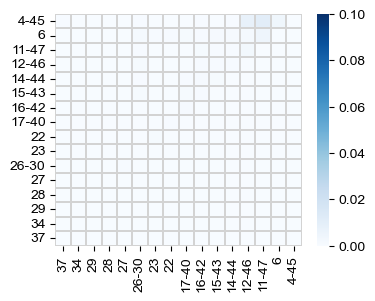

In [26]:
#plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(df_mi, cmap='Blues', linewidth=0.3, linecolor='lightgrey', vmax=0.1, vmin=0)
set_size(3, 2.4)
plt.tight_layout()
plt.savefig('mi_all_km_shuf.svg')